## Ques 1 Consider the entire Yale Faces datase

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from random import sample
import shutil
from zipfile import ZipFile
import warnings
warnings.filterwarnings("ignore") 

In [55]:
my_dir = os.getcwd() 
zip_folder = os.path.join(my_dir,"yalefaces.zip")
print("Path to the zipped folder is {}".format(zip_folder))
with ZipFile(zip_folder, 'r') as zip: 
    zip.extractall()

Path to the zipped folder is /Users/udaysingh/Desktop/IIT/Dimensionality Reduction/Hashing assignment /yalefaces.zip


['subject04.leftlight', 'subject01.wink', 'subject06.surprised', 'subject07.glasses', 'subject15.rightlight', 'subject12.surprised', 'subject10.leftlight', 'subject06.happy', 'subject03.centerlight', 'subject09.rightlight', 'subject01.normal', 'subject09.leftlight', 'subject13.normal', 'subject04.happy', 'subject14.noglasses', 'subject15.sleepy', 'subject04.rightlight', 'subject07.sleepy', 'subject11.normal', 'subject13.centerlight', 'subject03.normal', 'subject02.leftlight', 'subject05.sleepy', 'subject01.rightlight', 'subject14.surprised', 'subject09.sleepy', 'subject01.gif', 'subject06.glasses', 'subject02.happy', 'subject12.noglasses', 'subject10.rightlight', 'subject06.noglasses', 'subject09.sad', 'subject06.centerlight', 'subject08.sad', 'subject13.sleepy', 'subject13.surprised', 'subject11.leftlight', 'subject05.happy', 'subject05.leftlight', 'subject05.centerlight', 'subject07.surprised', 'subject01.sleepy', 'subject07.normal', 'subject15.normal', 'subject07.wink', 'subject06.r

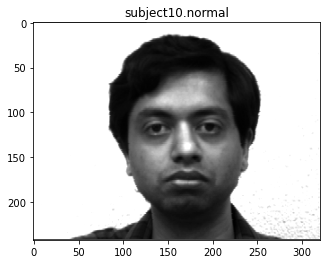

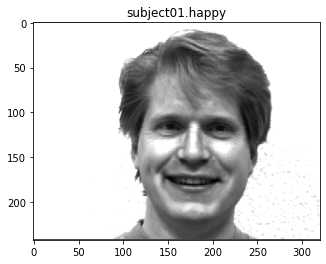

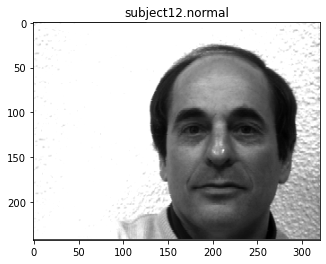

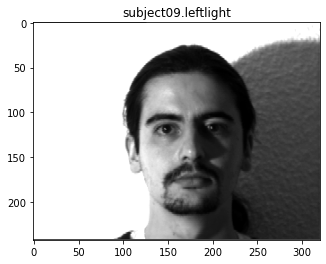

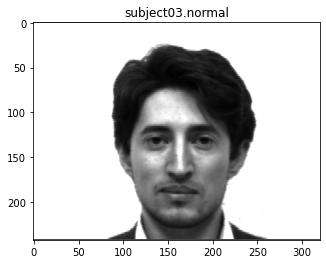

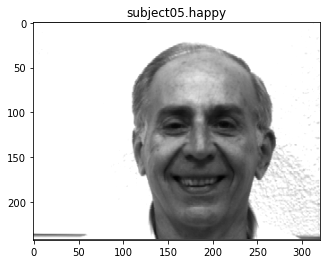

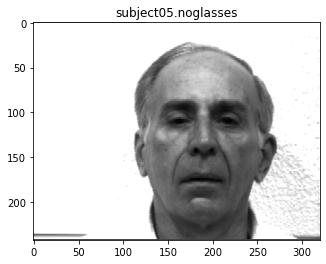

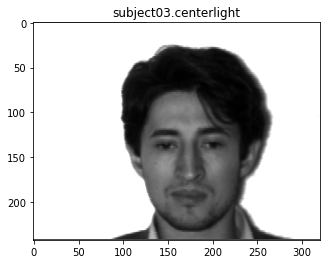

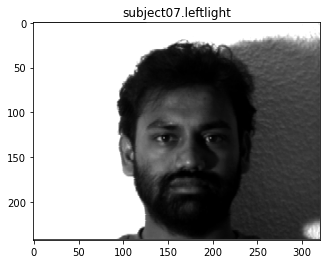

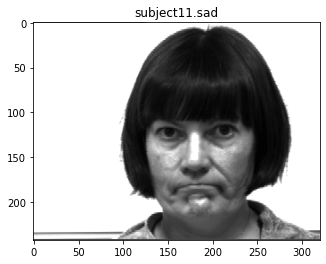

In [56]:
data_folder = os.path.join(my_dir,"yalefaces")
file_list = os.listdir(data_folder)
print(file_list)
sample_images = sample(file_list,10) 
for img_name in sample_images:
    image_path = os.path.join(data_folder,img_name)
    image = mpimg.imread(image_path)
    plt.imshow(image,cmap="gray")
    plt.title(img_name)
    plt.show()

### Divide the dataset into training and testing sets

In [57]:
train_folder_path = os.path.join(my_dir,"Faces_Train")
test_folder_path = os.path.join(my_dir,"Faces_Test")

## Delete the folders if they exist already
if os.path.exists(train_folder_path):
    shutil.rmtree(train_folder_path)

if os.path.exists(test_folder_path):
    shutil.rmtree(test_folder_path)

os.mkdir(train_folder_path)  ## Creates a new directory
os.mkdir(test_folder_path) ## Creates a new directory

idx_list = [str(i).zfill(2) for i in range(1,16,1)] 
print(idx_list)

file_name_list = [[] for i in range(15)]

for i in range(len(idx_list)):
    for fname in file_list:
        if fname.startswith("subject"+idx_list[i]):
            file_name_list[i].append(os.path.join(data_folder,fname))

print(file_name_list)

for i in range(len(idx_list)):
    ls = file_name_list[i]  
    test_idx = np.random.choice(11)  
    test_file = ls[test_idx]
    shutil.copy(test_file,test_folder_path)
    
    ls.remove(ls[test_idx])
    
    for train_file in ls:
        shutil.copy(train_file,train_folder_path)

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15']
[['/Users/udaysingh/Desktop/IIT/Dimensionality Reduction/Hashing assignment /yalefaces/subject01.wink', '/Users/udaysingh/Desktop/IIT/Dimensionality Reduction/Hashing assignment /yalefaces/subject01.normal', '/Users/udaysingh/Desktop/IIT/Dimensionality Reduction/Hashing assignment /yalefaces/subject01.rightlight', '/Users/udaysingh/Desktop/IIT/Dimensionality Reduction/Hashing assignment /yalefaces/subject01.gif', '/Users/udaysingh/Desktop/IIT/Dimensionality Reduction/Hashing assignment /yalefaces/subject01.sleepy', '/Users/udaysingh/Desktop/IIT/Dimensionality Reduction/Hashing assignment /yalefaces/subject01.noglasses', '/Users/udaysingh/Desktop/IIT/Dimensionality Reduction/Hashing assignment /yalefaces/subject01.surprised', '/Users/udaysingh/Desktop/IIT/Dimensionality Reduction/Hashing assignment /yalefaces/subject01.happy', '/Users/udaysingh/Desktop/IIT/Dimensionality Reduction/Hashing assignme

### Find eigen-vectors

In [58]:
train_files_list = os.listdir(train_folder_path)
#print(train_files_list)
train_ls = []
for file in train_files_list:
    img_file = os.path.join(train_folder_path,file)
    arr = mpimg.imread(img_file)
    #print(arr.shape)
    arr = arr.reshape(1,arr.shape[0]*arr.shape[1]) ## Convert to a 1D matrix
    train_ls.append(np.ravel(arr)) ## Before appending, convert the 1D martix to a 1d array using np.ravel 
train_mat = np.matrix(train_ls)
print(train_mat.shape)
mean_img = np.mean(train_mat,axis=0)
print(mean_img.shape)
cov = np.cov(train_mat)
print(cov.shape)
eig_val,eig_vec = np.linalg.eig(cov)
#print(eig_vec)

(151, 77760)
(1, 77760)
(151, 151)


### Find the right singular vectors

In [59]:
eigen_vec_ls = []

for i in range(eig_vec.shape[1]):
    eig1 = train_mat.T@eig_vec[:,i]
    eig1 = eig1/eig_val[i]
    eigen_vec_ls.append(np.ravel(eig1))
print(eigen_vec_ls)

[array([-0.00214766+0.j, -0.00215705+0.j, -0.00216438+0.j, ...,
       -0.00116606+0.j, -0.00116606+0.j, -0.00116606+0.j]), array([0.00059684+0.j, 0.00046344+0.j, 0.0004068 +0.j, ...,
       0.0004328 +0.j, 0.0004328 +0.j, 0.0004328 +0.j]), array([-0.00084103+0.j, -0.0006782 +0.j, -0.00078788+0.j, ...,
       -0.00134714+0.j, -0.00134714+0.j, -0.00134714+0.j]), array([0.00525552+0.j, 0.00502318+0.j, 0.00482464+0.j, ...,
       0.00270927+0.j, 0.00270927+0.j, 0.00270927+0.j]), array([4.57623834e-04+0.j, 8.07940294e-05+0.j, 6.64151672e-05+0.j, ...,
       4.04419466e-05+0.j, 4.04419466e-05+0.j, 4.04419466e-05+0.j]), array([-0.00325296+0.j, -0.00339756+0.j, -0.00364183+0.j, ...,
       -0.00195811+0.j, -0.00195811+0.j, -0.00195811+0.j]), array([0.00344404+0.j, 0.00256195+0.j, 0.00170496+0.j, ...,
       0.0025024 +0.j, 0.0025024 +0.j, 0.0025024 +0.j]), array([-0.00290965+0.j, -0.00124732+0.j, -0.00099809+0.j, ...,
       -0.00160789+0.j, -0.00160789+0.j, -0.00160789+0.j]), array([0.001203

### Find the principal components

In [60]:
sort_idx = np.argsort(eig_val) ## indices for eigenvalues which are in ascending order
sort_idx = sort_idx[::-1]

eig_val_sum = np.sum(eig_val)
temp_sum = 0
principal_eig_vec = []
principal_eig_val = []
i=0
while(temp_sum<0.95*eig_val_sum):
    principal_eig_vec.append(eigen_vec_ls[sort_idx[i]])
    principal_eig_val.append(eig_val[sort_idx[i]])
    temp_sum += eig_val[sort_idx[i]]
    i += 1
print("Number of components is {}".format(i))

Number of components is 27


## Ques 2 . Obtain the transformation matrix Q and mean vector μ by performing Principal Component analysis on the dataset

In [61]:
Q_hat = np.matrix(principal_eig_vec)
mu=mean_img

In [62]:
print(Q_hat)
print(50*"*")
print(mu)

[[-0.00214766+0.j -0.00215705+0.j -0.00216438+0.j ... -0.00116606+0.j
  -0.00116606+0.j -0.00116606+0.j]
 [ 0.00059684+0.j  0.00046344+0.j  0.0004068 +0.j ...  0.0004328 +0.j
   0.0004328 +0.j  0.0004328 +0.j]
 [-0.00084103+0.j -0.0006782 +0.j -0.00078788+0.j ... -0.00134714+0.j
  -0.00134714+0.j -0.00134714+0.j]
 ...
 [-0.01471468+0.j -0.01360074+0.j -0.00781356+0.j ... -0.00026859+0.j
  -0.00026859+0.j -0.00026859+0.j]
 [ 0.00044234+0.j -0.00021813+0.j  0.00082864+0.j ...  0.00054024+0.j
   0.00054024+0.j  0.00054024+0.j]
 [ 0.00651478+0.j  0.00884456+0.j  0.01089015+0.j ...  0.00639116+0.j
   0.00639116+0.j  0.00639116+0.j]]
**************************************************
[[123.60264901 123.59602649 123.74172185 ...  68.          68.
   68.        ]]


## Ques 3 Obtain the feature vector for every training set by using the transformation v = QT (x − μ).

In [63]:
test_files = os.listdir(test_folder_path)
feat_vec_ls = []
for file in test_files:
    img_file = os.path.join(test_folder_path,file)
    test_img = mpimg.imread(img_file)
    test_img = test_img.reshape(arr.shape[0]*arr.shape[1],1)
    test_img = test_img - mean_img.T
    #print(np.linalg.pinv(Q_hat).shape,test_img.shape)
    feat_vec = np.linalg.pinv(Q_hat).T@test_img
    feat_vec_ls.append(np.ravel(feat_vec))

In [64]:
vec_len=len(feat_vec_ls[0])

## Ques 4 Generate around 50 random vectors of dimension n_dim, where n_dim is the number of dimensions in v.

In [65]:
def genRandomHashVectors(m, length):  
    hash_vector = []
    for i in range(m):
        v = np.random.uniform(-1,1,length)
        vcap = v / np.linalg.norm(v)
        hash_vector.append(vcap)
    return hash_vector   

In [66]:
hash_vec=genRandomHashVectors(50, vec_len)
hash_vec

[array([ 0.34591867,  0.16806129,  0.12636416, -0.33031163, -0.31790282,
        -0.11698932,  0.00395763,  0.01693813,  0.20546321,  0.04510319,
        -0.00957556, -0.22792941,  0.06519635,  0.16877408, -0.16880995,
        -0.00818137,  0.12861091, -0.020727  , -0.03333135,  0.30948747,
         0.03198648, -0.15070211,  0.33862808,  0.28916002, -0.33746708,
         0.02300395, -0.06391402]),
 array([-0.00987736, -0.22923514,  0.3063906 , -0.25499309,  0.23795316,
         0.14955574, -0.25126354, -0.03366151,  0.14805977, -0.08295081,
         0.32978807,  0.32068119,  0.00717959,  0.09465044,  0.02339838,
        -0.09221844, -0.21190432, -0.31666111, -0.1715176 ,  0.18688806,
         0.1051667 ,  0.16472339, -0.05264311,  0.14839019, -0.13957824,
         0.26210543,  0.16140497]),
 array([ 0.11397658,  0.33004995,  0.03317738,  0.37374858, -0.1203265 ,
         0.21308226, -0.1594946 , -0.09572112, -0.10472246,  0.07955076,
         0.00167941, -0.18976435, -0.19549634, -0.13

## Ques 5 Generate 50-bit hash representation of each of the feature vectors.

In [67]:
def localSensitiveHashing(hash_vector ,data): 
    hash_code = []
    for i in range(len(hash_vector)):
        if np.dot(data,hash_vector[i]) > 0:
            hash_code.append('1')
        else:
            hash_code.append('0')
    return hash_code 

In [68]:
localSensitiveHashing(hash_vec ,feat_vec_ls[1])

['0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1']

## Ques 6 Calculate the L1-norm distance between the hash representation of a par- ticular feature vector with the hash representation of other feature vectors and sort the vectors based on the distance values.

In [69]:
n= np.random.randint(1,vec_len)
list_1=[]
n

2

In [74]:
for i in range (len(feat_vec_ls)):
    list_1.append(np.linalg.norm((feat_vec_ls[i]- feat_vec_ls[n]),ord=1))

In [75]:
list_1.sort()

In [77]:
print(list_1)


[0.0, 0.0, 19493.33430272643, 19493.33430272643, 33055.772201807704, 33055.772201807704, 43898.049877393634, 43898.049877393634, 46546.098735956424, 46546.098735956424, 47807.83737200257, 47807.83737200257, 48566.035537496005, 48566.035537496005, 53688.45962243027, 53688.45962243027, 54544.23542293279, 54544.23542293279, 62696.4271857043, 62696.4271857043, 67013.92031467232, 67013.92031467232, 74191.7200804725, 74191.7200804725, 75404.537924904, 75404.537924904, 101025.8057629747, 101025.8057629747, 110194.37824953599, 110194.37824953599]
